In [2]:
import random
import itertools
import operator
import pickle
import pipe21 as P

from graphviz import Graph
import networkx as nx
import umap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from musictool.noteset import NoteSet
from musictool.noteset import NoteRange
from musictool.note import Note
from musictool.scale import Scale
from musictool.chord import SpecificChord
from musictool.chord import Chord
from musictool.voice_leading.transition import chord_transitions
from musictool.voice_leading.transition import transition_graph

In [3]:
SpecificChordGraph = dict[SpecificChord, frozenset[SpecificChord]]
AbstractChordGraph = dict[Chord, frozenset[Chord]]
AbstractStrGraph = dict[str, frozenset[str]]


def abstract_graph(g: SpecificChordGraph) -> AbstractChordGraph:
    return {
        k.abstract: frozenset(c.abstract for c in v)
        for k, v in g.items()
    }

def str_graph(g: AbstractChordGraph) -> AbstractStrGraph:
    return {
        str(k): frozenset(str(c) for c in v)
        for k, v in g.items()
    } 

In [4]:
scale = Scale.from_name('C', 'major')
noterange = NoteRange('C1', 'C3', noteset=scale)

In [5]:
c = SpecificChord.from_str('C2_D2')

In [6]:
ns = NoteSet.from_str('CD')
ns

CD

In [7]:
chord_transitions(c, noterange)

frozenset({B1_D2, C2_E2})

In [11]:
graph = transition_graph(c, noterange)
graph = abstract_graph(graph)
graph = str_graph(graph)
graph

{'CD': frozenset({'C', 'CE', 'DB'}),
 'DB': frozenset({'CB', 'CD', 'DA', 'EB'}),
 'DA': frozenset({'CA', 'DB', 'DG', 'EA'}),
 'CA': frozenset({'AB', 'CB', 'CG'}),
 'AB': frozenset({'A', 'B', 'CA', 'GB'}),
 'GB': frozenset({'AB', 'CG', 'FB', 'GA'}),
 'FB': frozenset({'CF', 'EB', 'FA', 'GB'}),
 'CF': frozenset({'CE', 'CG', 'FB'}),
 'CE': frozenset({'CD', 'CF', 'EB'}),
 'DE': frozenset({'CE', 'DF'}),
 'D': frozenset({'CD', 'DE'}),
 'EB': frozenset({'CE', 'DB', 'EA', 'FB'}),
 'EA': frozenset({'DA', 'EB', 'EG', 'FA'}),
 'DG': frozenset({'CG', 'DA', 'DF', 'EG'}),
 'DF': frozenset({'CF', 'DE', 'DG', 'EF'}),
 'EF': frozenset({'DF', 'EG'}),
 'EG': frozenset({'DG', 'EA', 'EF', 'FG'}),
 'FG': frozenset({'EG', 'F', 'FA', 'G'}),
 'FA': frozenset({'EA', 'FB', 'FG', 'GA'}),
 'GA': frozenset({'A', 'FA', 'G', 'GB'}),
 'CG': frozenset({'CA', 'CF', 'DG', 'GB'}),
 'CB': frozenset({'CA', 'DB'}),
 'C': frozenset({'CB', 'CD'}),
 'B': frozenset({'AB', 'CB'}),
 'A': frozenset({'AB', 'GA'}),
 'F': frozenset({'E

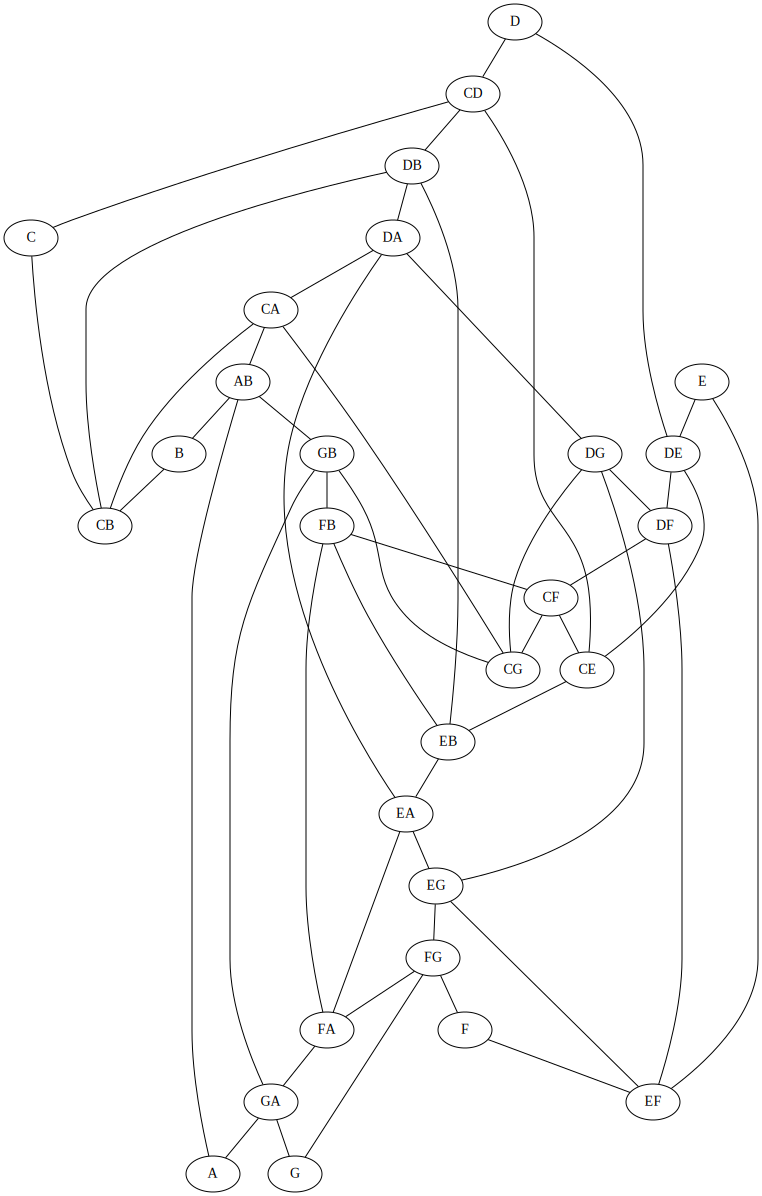

In [12]:
g = Graph()

rendered = set()

for node, childs in graph.items():
    for child in childs:
        a, b = str(node), str(child)
        pair = frozenset({a, b})
        if pair in rendered:
            continue
        g.edge(a, b)
        rendered.add(pair)
g

# with open('/tmp/tree.pdf', 'wb') as fd:
#     fd.write(g.pipe(format='pdf'))
# !open /tmp/tree.pdf

In [13]:
len(graph)

28

In [14]:
G = nx.Graph(graph)

In [15]:
tup = tuple(graph)
n = len(graph)

In [16]:
# data = np.zeros((n, n), dtype='int32')
# for i in range(n):
#     for j in range(n):
#         data[i, j] = nx.shortest_path_length(G, tup[i], tup[j])

In [17]:
data = pd.DataFrame(np.zeros((n, n), dtype='int32'), index=tup, columns=tup, dtype='int32')
for a, b in itertools.product(tup, tup):
    data.loc[a, b] = nx.shortest_path_length(G, a, b)
data

,CD,DB,DA,CA,AB,GB,FB,CF,CE,DE,...,FA,GA,CG,CB,C,B,A,F,E,G
CD,0,1,2,3,4,4,3,2,1,2,...,4,5,3,2,1,3,5,5,3,6
DB,1,0,1,2,3,3,2,3,2,3,...,3,4,3,1,2,2,4,5,4,5
DA,2,1,0,1,2,3,3,3,3,3,...,2,3,2,2,3,3,3,4,4,4
CA,3,2,1,0,1,2,3,2,3,4,...,3,3,1,1,2,2,2,5,5,4
AB,4,3,2,1,0,1,2,3,4,5,...,3,2,2,2,3,1,1,5,6,3
GB,4,3,3,2,1,0,1,2,3,4,...,2,1,1,3,4,2,2,4,5,2
FB,3,2,3,3,2,1,0,1,2,3,...,1,2,2,3,4,3,3,3,4,3
CF,2,3,3,2,3,2,1,0,1,2,...,2,3,1,3,3,4,4,3,3,4
CE,1,2,3,3,4,3,2,1,0,1,...,3,4,2,3,2,4,5,4,2,5
DE,2,3,3,4,5,4,3,2,1,0,...,4,5,3,4,3,5,6,3,1,5


# umap 2D embedding

In [18]:
e = umap.UMAP(n_neighbors=15, min_dist=0.9, n_components=2, learning_rate=0.001).fit_transform(data)
e

OMP: Info #273: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


array([[0.8138086 , 6.722987  ],
       [1.5208198 , 4.885054  ],
       [3.1911402 , 4.1741595 ],
       [2.8826737 , 2.3834717 ],
       [4.06156   , 0.7964952 ],
       [5.6852818 , 1.9033495 ],
       [6.0375786 , 3.7619758 ],
       [4.371671  , 6.8061504 ],
       [2.7055752 , 7.5279546 ],
       [3.6723294 , 9.220146  ],
       [1.7616305 , 8.456269  ],
       [3.2359762 , 5.759055  ],
       [6.6653714 , 5.1602373 ],
       [5.824145  , 6.4127016 ],
       [5.3461905 , 8.308464  ],
       [7.3806596 , 8.571941  ],
       [7.7845445 , 6.6062007 ],
       [9.196932  , 5.271865  ],
       [7.9283943 , 3.8329406 ],
       [7.7408566 , 1.8207246 ],
       [4.5189705 , 3.3283424 ],
       [0.9875475 , 2.985157  ],
       [0.21927822, 4.8384876 ],
       [2.1033595 , 1.3104193 ],
       [6.166973  , 0.67854863],
       [8.872165  , 7.319418  ],
       [5.7327366 , 9.545847  ],
       [9.105144  , 3.2120311 ]], dtype=float32)

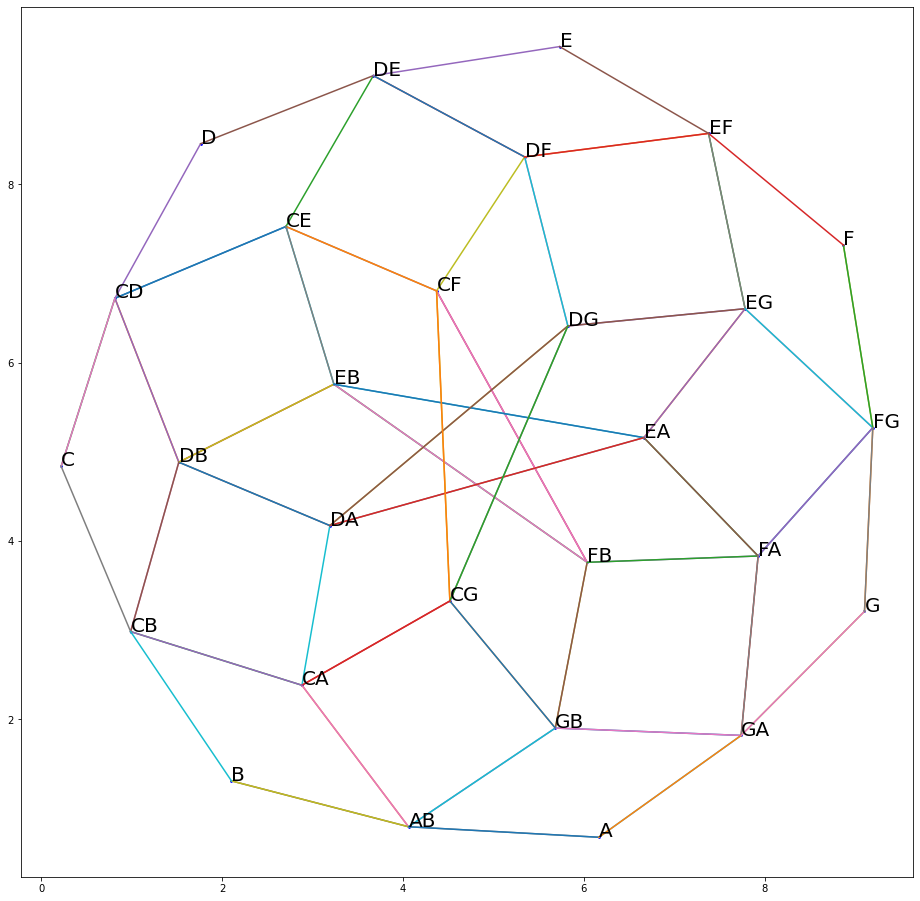

In [19]:
plt.figure(figsize=(16, 16))
plt.scatter(*e.T, s=3, color='b')

for i, (chord) in enumerate(tup):
    plt.annotate(str(chord), (e[i, 0], e[i, 1]), fontsize=20)
    
    
for k, v in graph.items():
    i = tup.index(k)
    js = [tup.index(vv) for vv in v]
    
    for j in js:
        plt.plot([e[i, 0], e[j, 0]], [e[i, 1], e[j, 1]])

In [20]:
def rootless_key(noteset: NoteSet, scale: NoteSet, hash_: bool = True) -> frozenset[int]:
    """
    inverse-free
    like name for notesets which have root
    but for rootless notesets
    """
    s = set()
    for perm in itertools.permutations(noteset, len(noteset)):
        s.add(tuple(scale.subtract(a, b) for a, b in itertools.pairwise(perm)))
    fs = frozenset(s)
#     fs = frozenset(scale.subtract(a, b) for a, b in itertools.permutations(noteset, 2))
    if hash_:
        return hash(fs)
    return fs

def groupby_name(scale: NoteSet, n_notes: int = 2):
    return (
        itertools.combinations(scale, n_notes)
        | P.Map(frozenset)
        | P.Map(NoteSet)
        | P.KeyBy(lambda chord: rootless_key(chord, scale))
        | P.MapValues(str)
        | P.Sorted(key=operator.itemgetter(0))
        | P.GroupBy(operator.itemgetter(0))
        | P.Values()
        | P.Map(lambda x: x | P.Values() | P.Pipe(list))
        | P.Pipe(list)
    )

In [21]:
groupby_name(scale, 2)

[['CE', 'CA', 'DF', 'DB', 'EG', 'FA', 'GB'],
 ['CD', 'CB', 'DE', 'EF', 'FG', 'GA', 'AB'],
 ['CF', 'CG', 'DG', 'DA', 'EA', 'EB', 'FB']]

In [22]:
groupby_name(scale, 3)

[['CEG', 'CEA', 'CFA', 'DFA', 'DFB', 'DGB', 'EGB'],
 ['CDE', 'CDB', 'CAB', 'DEF', 'EFG', 'FGA', 'GAB'],
 ['CDA', 'CEF', 'CGB', 'DEB', 'DFG', 'EGA', 'FAB'],
 ['CDF', 'CEB', 'CGA', 'DEG', 'DAB', 'EFA', 'FGB'],
 ['CDG', 'CFG', 'CFB', 'DEA', 'DGA', 'EFB', 'EAB']]

In [23]:
q = groupby_name(scale, 2)[2]
q

['CF', 'CG', 'DG', 'DA', 'EA', 'EB', 'FB']

In [35]:
df = data.astype(float)
df

,CD,DB,DA,CA,AB,GB,FB,CF,CE,DE,...,FA,GA,CG,CB,C,B,A,F,E,G
CD,0.0,1.0,2.0,3.0,4.0,4.0,3.0,2.0,1.0,2.0,...,4.0,5.0,3.0,2.0,1.0,3.0,5.0,5.0,3.0,6.0
DB,1.0,0.0,1.0,2.0,3.0,3.0,2.0,3.0,2.0,3.0,...,3.0,4.0,3.0,1.0,2.0,2.0,4.0,5.0,4.0,5.0
DA,2.0,1.0,0.0,1.0,2.0,3.0,3.0,3.0,3.0,3.0,...,2.0,3.0,2.0,2.0,3.0,3.0,3.0,4.0,4.0,4.0
CA,3.0,2.0,1.0,0.0,1.0,2.0,3.0,2.0,3.0,4.0,...,3.0,3.0,1.0,1.0,2.0,2.0,2.0,5.0,5.0,4.0
AB,4.0,3.0,2.0,1.0,0.0,1.0,2.0,3.0,4.0,5.0,...,3.0,2.0,2.0,2.0,3.0,1.0,1.0,5.0,6.0,3.0
GB,4.0,3.0,3.0,2.0,1.0,0.0,1.0,2.0,3.0,4.0,...,2.0,1.0,1.0,3.0,4.0,2.0,2.0,4.0,5.0,2.0
FB,3.0,2.0,3.0,3.0,2.0,1.0,0.0,1.0,2.0,3.0,...,1.0,2.0,2.0,3.0,4.0,3.0,3.0,3.0,4.0,3.0
CF,2.0,3.0,3.0,2.0,3.0,2.0,1.0,0.0,1.0,2.0,...,2.0,3.0,1.0,3.0,3.0,4.0,4.0,3.0,3.0,4.0
CE,1.0,2.0,3.0,3.0,4.0,3.0,2.0,1.0,0.0,1.0,...,3.0,4.0,2.0,3.0,2.0,4.0,5.0,4.0,2.0,5.0
DE,2.0,3.0,3.0,4.0,5.0,4.0,3.0,2.0,1.0,0.0,...,4.0,5.0,3.0,4.0,3.0,5.0,6.0,3.0,1.0,5.0


In [30]:
for q in groupby_name(scale, 2):
    for a, b in itertools.product(q, q):
        df.loc[a, b] *= 0.1
df

,CD,DB,DA,CA,AB,GB,FB,CF,CE,DE,...,FA,GA,CG,CB,C,B,A,F,E,G
CD,0.0,1.0,2.0,3.0,0.4,4.0,3.0,2.0,1.0,0.2,...,4.0,0.5,3.0,0.2,1.0,3.0,5.0,5.0,3.0,6.0
DB,1.0,0.0,1.0,0.2,3.0,0.3,2.0,3.0,0.2,3.0,...,0.3,4.0,3.0,1.0,2.0,2.0,4.0,5.0,4.0,5.0
DA,2.0,1.0,0.0,1.0,2.0,3.0,0.3,0.3,3.0,3.0,...,2.0,3.0,0.2,2.0,3.0,3.0,3.0,4.0,4.0,4.0
CA,3.0,0.2,1.0,0.0,1.0,0.2,3.0,2.0,0.3,4.0,...,0.3,3.0,1.0,1.0,2.0,2.0,2.0,5.0,5.0,4.0
AB,0.4,3.0,2.0,1.0,0.0,1.0,2.0,3.0,4.0,0.5,...,3.0,0.2,2.0,0.2,3.0,1.0,1.0,5.0,6.0,3.0
GB,4.0,0.3,3.0,0.2,1.0,0.0,1.0,2.0,0.3,4.0,...,0.2,1.0,1.0,3.0,4.0,2.0,2.0,4.0,5.0,2.0
FB,3.0,2.0,0.3,3.0,2.0,1.0,0.0,0.1,2.0,3.0,...,1.0,2.0,0.2,3.0,4.0,3.0,3.0,3.0,4.0,3.0
CF,2.0,3.0,0.3,2.0,3.0,2.0,0.1,0.0,1.0,2.0,...,2.0,3.0,0.1,3.0,3.0,4.0,4.0,3.0,3.0,4.0
CE,1.0,0.2,3.0,0.3,4.0,0.3,2.0,1.0,0.0,1.0,...,0.3,4.0,2.0,3.0,2.0,4.0,5.0,4.0,2.0,5.0
DE,0.2,3.0,3.0,4.0,0.5,4.0,3.0,2.0,1.0,0.0,...,4.0,0.5,3.0,0.4,3.0,5.0,6.0,3.0,1.0,5.0


In [70]:
e = umap.UMAP(n_neighbors=15, min_dist=0.9, n_components=2, learning_rate=0.001).fit_transform(df)

In [92]:
e

array([[0.8201461 , 6.734209  ],
       [1.5114546 , 4.8607025 ],
       [3.185484  , 4.1602488 ],
       [2.9091494 , 2.3891788 ],
       [4.0860486 , 0.8023822 ],
       [5.6884546 , 1.9168336 ],
       [6.0385094 , 3.7446709 ],
       [4.3691874 , 6.8161197 ],
       [2.6961522 , 7.546862  ],
       [3.67714   , 9.227247  ],
       [1.7534438 , 8.460803  ],
       [3.2160099 , 5.7262087 ],
       [6.654519  , 5.1336284 ],
       [5.8238153 , 6.406596  ],
       [5.3577223 , 8.315007  ],
       [7.3876004 , 8.564273  ],
       [7.754897  , 6.557823  ],
       [9.2053795 , 5.2928667 ],
       [7.9429135 , 3.8210828 ],
       [7.748883  , 1.8281783 ],
       [4.52069   , 3.3351038 ],
       [0.9969242 , 2.9734468 ],
       [0.19775778, 4.84762   ],
       [2.1305625 , 1.3462118 ],
       [6.1788487 , 0.6856535 ],
       [8.86529   , 7.313258  ],
       [5.73544   , 9.574946  ],
       [9.0949335 , 3.2365756 ]], dtype=float32)

In [94]:
X = pd.DataFrame(
    np.hstack((e, np.zeros((e.shape[0], 1), dtype='float32'))),
    index = df.index,
    columns=list('xyz'),
)
X

,x,y,z
CD,0.820146,6.734209,0.0
DB,1.511455,4.860703,0.0
DA,3.185484,4.160249,0.0
CA,2.909149,2.389179,0.0
AB,4.086049,0.802382,0.0
GB,5.688455,1.916834,0.0
FB,6.038509,3.744671,0.0
CF,4.369187,6.816120,0.0
CE,2.696152,7.546862,0.0
DE,3.677140,9.227247,0.0


In [95]:
z = 10
for q in groupby_name(scale, 2):
    for x in q:
        X.loc[x, 'z'] = z # kinda z
    z += 10
        
    print(q)
#     for a, b in itertools.product(q, q):
#         df.loc[a, b] *= 0.1


['CE', 'CA', 'DF', 'DB', 'EG', 'FA', 'GB']
['CD', 'CB', 'DE', 'EF', 'FG', 'GA', 'AB']
['CF', 'CG', 'DG', 'DA', 'EA', 'EB', 'FB']


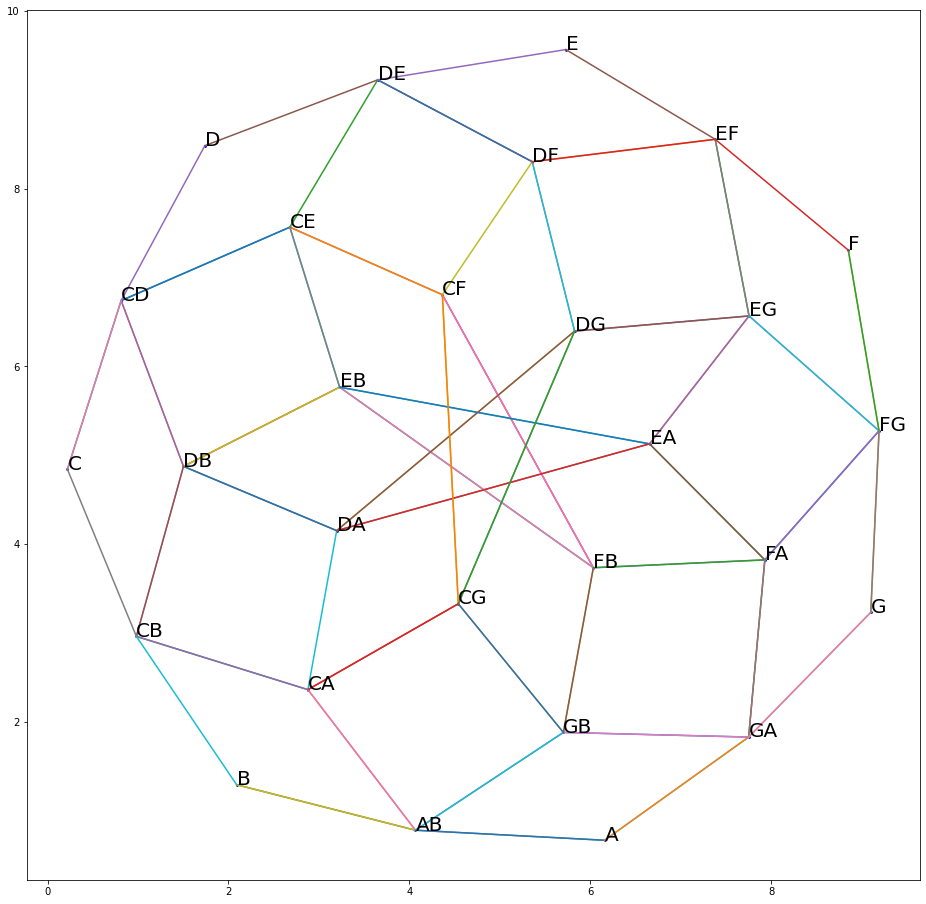

In [34]:
e = umap.UMAP(n_neighbors=15, min_dist=0.9, n_components=2, learning_rate=0.001).fit_transform(df)
plt.figure(figsize=(16, 16))
plt.scatter(*e.T, s=3, color='b')

for i, (chord) in enumerate(tup):
    plt.annotate(str(chord), (e[i, 0], e[i, 1]), fontsize=20)
    
    
for k, v in graph.items():
    i = tup.index(k)
    js = [tup.index(vv) for vv in v]
    
    for j in js:
        plt.plot([e[i, 0], e[j, 0]], [e[i, 1], e[j, 1]])

In [96]:
# e = umap.UMAP(n_neighbors=15, min_dist=0.9, n_components=3, learning_rate=0.001).fit_transform(df)
str_graph = {str(k): frozenset(str(vv) for vv in v) for k, v in graph.items()}
with open('graph.pkl', 'wb') as f:
    pickle.dump(str_graph, f)
    

# X = pd.DataFrame(e * 3, columns=list('xyz'))
# X = pd.DataFrame(e[:, [1, 2, 0]] * 3, columns=list('xyz'))
# X.index = [str(c) for c in tup]
X.to_csv('X.csv')
# X

In [98]:
X

,x,y,z
CD,0.820146,6.734209,10.0
DB,1.511455,4.860703,0.0
DA,3.185484,4.160249,20.0
CA,2.909149,2.389179,0.0
AB,4.086049,0.802382,10.0
GB,5.688455,1.916834,0.0
FB,6.038509,3.744671,20.0
CF,4.369187,6.816120,20.0
CE,2.696152,7.546862,0.0
DE,3.677140,9.227247,10.0


0 CF 6 FB
0 CF 1 CG
1 CG 0 CF
2 DG 3 DA
2 DG 1 CG
3 DA 4 EA
3 DA 2 DG
4 EA 3 DA
4 EA 5 EB
5 EB 4 EA
5 EB 6 FB
6 FB 0 CF
6 FB 5 EB


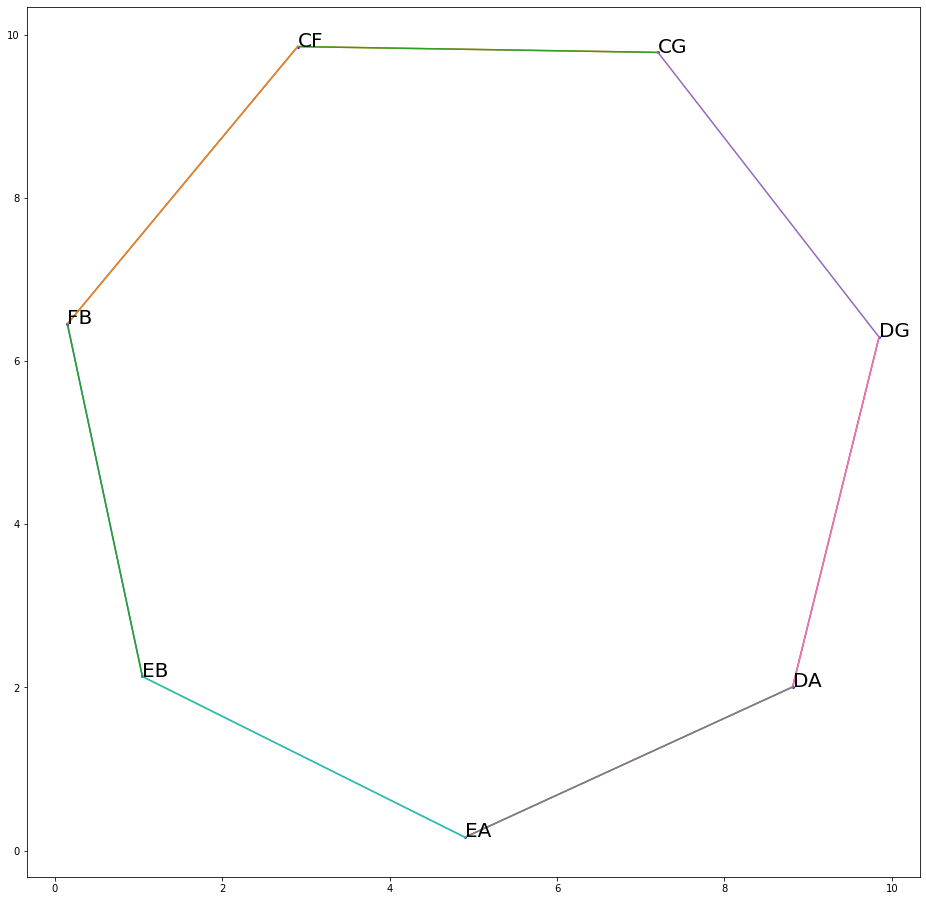

In [427]:
e = umap.UMAP(n_neighbors=3, min_dist=0.1, n_components=2, learning_rate=0.001).fit_transform(df)

plt.figure(figsize=(16, 16))
plt.scatter(*e.T, s=3, color='b')

for i, (chord) in enumerate(q):
    plt.annotate(str(chord), (e[i, 0], e[i, 1]), fontsize=20)
    
    for neighbor in graph[chord]:
        try:
            j = q.index(neighbor)
        except ValueError:
            continue
        else:
            print(i, chord, j, neighbor)
            plt.plot([e[i, 0], e[j, 0]], [e[i, 1], e[j, 1]])

In [29]:
ns0 = NoteSet(frozenset('CDF'))
ns1 = NoteSet(frozenset('CDA'))
              
# rootless_key(ns0, scale, hash_=False) == rootless_key(ns1, scale, hash_=False)
rootless_key(ns0, scale, hash_=False), rootless_key(ns1, scale, hash_=False)

(frozenset({(1, 4), (2, 1), (3, 6), (4, 2), (5, 3), (6, 5)}),
 frozenset({(1, 2), (2, 4), (3, 5), (4, 1), (5, 6), (6, 3)}))

In [30]:
ns0 = NoteSet(frozenset('CDF'))
ns1 = NoteSet(frozenset('CDA'))
              
rootless_key(ns0, scale, hash_=False), rootless_key(ns1, scale, hash_=False)

(frozenset({(1, 4), (2, 1), (3, 6), (4, 2), (5, 3), (6, 5)}),
 frozenset({(1, 2), (2, 4), (3, 5), (4, 1), (5, 6), (6, 3)}))

In [31]:
for perm in itertools.permutations(ns0, len(ns0)):
    print(''.join(map(lambda x: x.name, perm)))
    for a, b in itertools.pairwise(perm):
        print(f'\t{a.name}{b.name}', scale.subtract(a, b))

CDF
	CD 6
	DF 5
CFD
	CF 4
	FD 2
DCF
	DC 1
	CF 4
DFC
	DF 5
	FC 3
FCD
	FC 3
	CD 6
FDC
	FD 2
	DC 1


In [32]:
for a, b in itertools.permutations(ns0, 2):
    print(a.name, b.name, scale.subtract(a, b))

C D 6
C F 4
D C 1
D F 5
F C 3
F D 2


In [33]:
for a, b in itertools.permutations(ns1, 2):
    print(a.name, b.name, scale.subtract(a, b))

C D 6
C A 2
D C 1
D A 3
A C 5
A D 4


In [407]:
q = groupby_name(scale, 2)[2]
q

[CF, CG, DG, DA, EA, EB, FB]

In [408]:
q_str = [str(x) for x in q]
q_str

['CF', 'CG', 'DG', 'DA', 'EA', 'EB', 'FB']

In [409]:
n = len(q)

In [410]:
data = np.zeros((n, n), dtype='int32')
for i in range(n):
    for j in range(n):
        data[i, j] = nx.shortest_path_length(G, q[i], q[j])

In [411]:
pd.DataFrame(data, index=q_str, columns=q_str)

,CF,CG,DG,DA,EA,EB,FB
CF,0,1,2,3,3,2,1
CG,1,0,1,2,3,3,2
DG,2,1,0,1,2,3,3
DA,3,2,1,0,1,2,3
EA,3,3,2,1,0,1,2
EB,2,3,3,2,1,0,1
FB,1,2,3,3,2,1,0


# triads (3 note intervals)

In [98]:
c = SpecificChord.from_str('C2_D2_E2')
g = transition_graph(c, noterange)

In [101]:
graph = abstract_graph(g)
graph

{CDE: frozenset({CD, CDF, CE, DEB}),
 DEB: frozenset({CDE, CEB, DB, DEA, DFB, EB}),
 DFB: frozenset({CDF, CFB, DEB, DFA, DGB, EFB}),
 EFB: frozenset({CEF, DFB, EFA, EGB}),
 CEF: frozenset({CDF, CE, CEG, CF, DEF}),
 CEG: frozenset({CDG, CEA, CEF, CFG, DEG}),
 DEG: frozenset({CEG, DEA, DEF, DFG}),
 DFG: frozenset({CFG, DEG, DFA, EFG}),
 DFA: frozenset({CFA, DEA, DFB, DFG, DGA, EFA}),
 DGA: frozenset({CGA, DA, DFA, DG, DGB, EGA}),
 EGA: frozenset({DGA, EFA, EGB, FGA}),
 EGB: frozenset({CEG, DGB, EAB, EFB, EGA, FGB}),
 EAB: frozenset({CEA, DAB, EA, EB, EGB, FAB}),
 DAB: frozenset({CAB, CDA, DGB, EAB}),
 DGB: frozenset({CDG, CGB, DAB, DFB, DGA, EGB}),
 CGB: frozenset({CAB, CFB, CGA}),
 CG: frozenset({CFG, CGA, GB}),
 CA: frozenset({AB, CAB, CGA}),
 CDA: frozenset({CA, CDB, CDG, CEA, DA}),
 CEA: frozenset({CDA, CEB, CEG, CFA, DEA}),
 CEB: frozenset({CDB, CE, CEA, CFB, DEB}),
 CFB: frozenset({CEB, CF, CFA, CGB, DFB}),
 CFA: frozenset({CEA, CFB, CFG, CGA, DFA}),
 CFG: frozenset({CEG, CF, CFA, 

In [104]:
G = nx.Graph(graph)

In [105]:
tup = tuple(graph)
n = len(graph)

data = np.zeros((n, n), dtype='int32')
for i in range(n):
    for j in range(n):
        data[i, j] = nx.shortest_path_length(G, tup[i], tup[j])

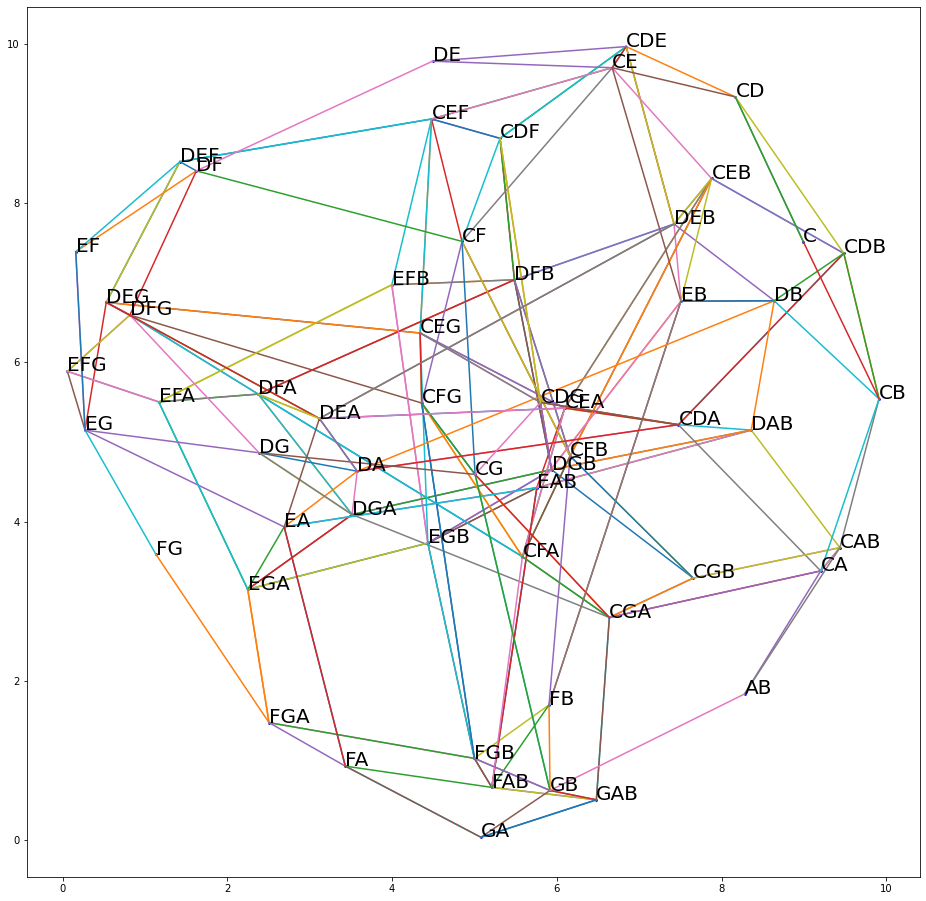

In [114]:
e = umap.UMAP(
    n_neighbors=10,
    min_dist=0.5,
    n_components=2,
    learning_rate=0.0001,
).fit_transform(data)

plt.figure(figsize=(16, 16))
plt.scatter(*e.T, s=3, color='b')

for i, (chord) in enumerate(tup):
    plt.annotate(str(chord), (e[i, 0], e[i, 1]), fontsize=20)
    
    
for k, v in graph.items():
    i = tup.index(k)
    js = [tup.index(vv) for vv in v]
    
    for j in js:
        plt.plot([e[i, 0], e[j, 0]], [e[i, 1], e[j, 1]])

# todo: 3d plot using `pyqtgraph`
- try to add many projections with tiers (like major, minor, diminished chords) Like tiers in 2D (2 notes chords)
    - start with 2D, because i already know which result i should get (tiers)
        - draw layered pyramid in pyqtgraph

In [185]:
e = umap.UMAP(
    n_neighbors=15,
    min_dist=0.9,
    n_components=3,
    learning_rate=0.0001,
).fit_transform(data)

In [186]:
str_graph = {str(k): frozenset(str(vv) for vv in v) for k, v in graph.items()}
with open('/Users/tandav/GoogleDrive/projects/pyqtgraph-3d-example/graph.pkl', 'wb') as f:
    pickle.dump(str_graph, f)
    
X = pd.DataFrame(e * 3, columns=list('xyz'))
X.index = [str(c) for c in tup]
X.to_csv('/Users/tandav/GoogleDrive/projects/pyqtgraph-3d-example/X.csv')
# X

In [174]:
# pd.read_csv('/Users/tandav/GoogleDrive/projects/pyqtgraph-3d-example/X.csv', index_col=0)

In [190]:
X

,x,y,z
CDE,21.207041,29.794128,20.986023
DEB,22.569107,23.643463,13.525978
DFB,16.776766,21.717590,20.163147
EFB,11.753110,22.131048,22.019747
CEF,14.043420,28.446091,28.153759
CEG,12.209728,19.740742,21.575459
DEG,1.768113,21.464931,9.241519
DFG,2.646433,20.659210,10.698839
DFA,7.456291,17.035912,9.261732
DGA,10.931017,11.634998,5.204042


# TODO fix graph - not all chords, add tests to musictool

In [194]:
assert set('CDEFGAB') <= set(X.index)

AssertionError: 

In [195]:
'C' in set(X.index)

True

# todo: sevenths (4 note chords)

In [ ]:
set('CDEFGAB') <= set(X.index)

In [25]:
import math
print(math.comb(7, 2) + math.comb(7, 1))
print(math.comb(7, 3) + math.comb(7, 2) + math.comb(7, 1))

28
63
